In [24]:
import pandas as pd
housing=pd.read_csv(r"C:\Users\sbm mehrauli\Desktop\malik's book\housing.csv")
print(housing['CHAS'].value_counts())



0    471
1     35
Name: CHAS, dtype: int64


In [25]:
%matplotlib inline

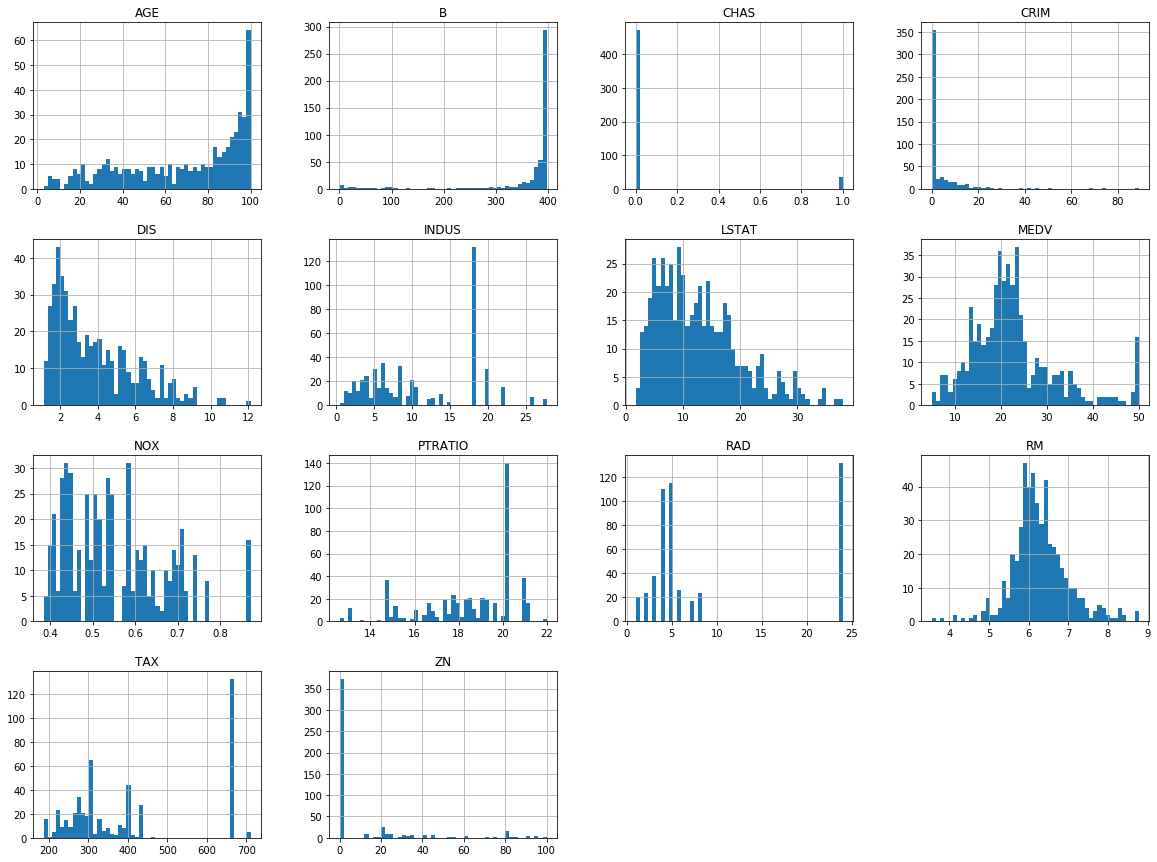

In [26]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07B42870>,
      dtype=object)

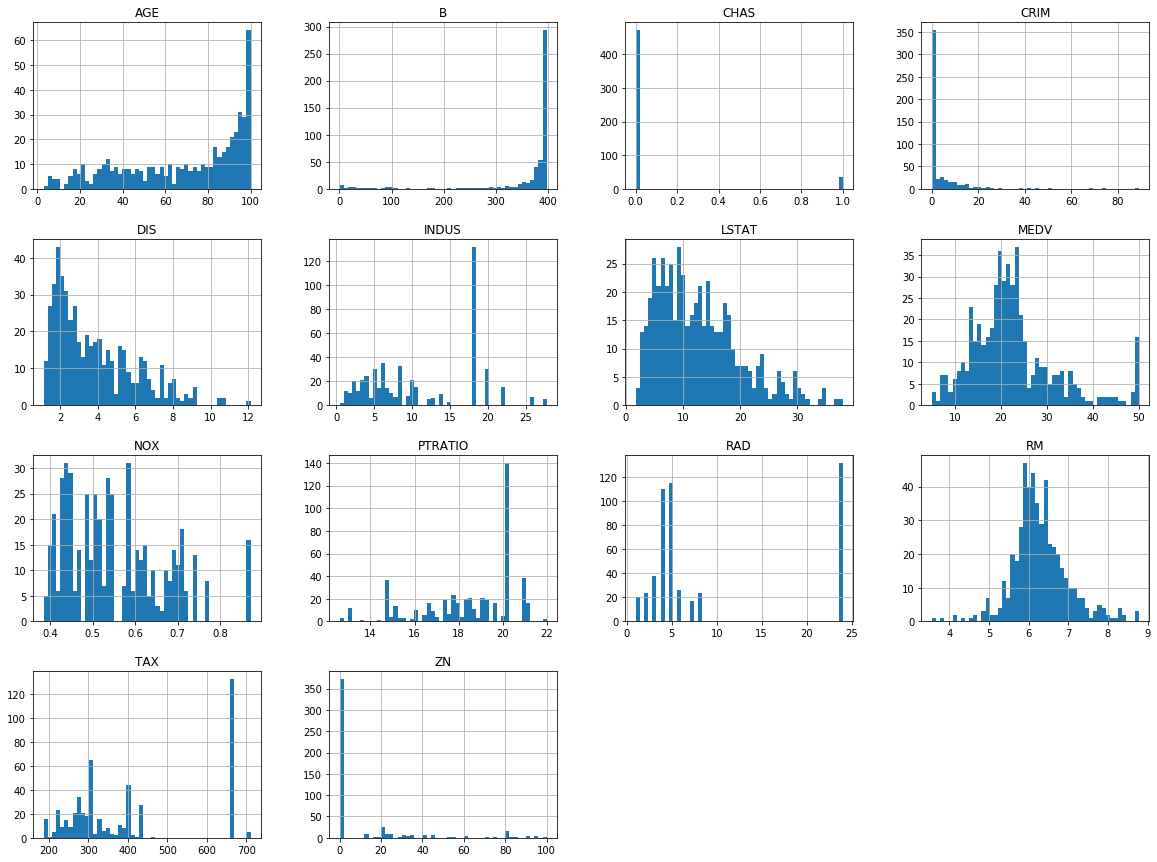

In [27]:
housing.hist(bins=50,figsize=(20,15))

In [ ]:
# # Split the train set test set data

In [28]:
import numpy as np
def train_test_split(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_index=shuffled[:test_set_size]
    train_index=shuffled[test_set_size:]
    return data.iloc[train_index],data.iloc[test_index]

In [29]:
train_set,test_set=train_test_split(housing,0.2)

In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 75 to 102
Data columns (total 14 columns):
CRIM       405 non-null float64
ZN         405 non-null float64
INDUS      405 non-null float64
CHAS       405 non-null int64
NOX        405 non-null float64
RM         405 non-null float64
AGE        405 non-null float64
DIS        405 non-null float64
RAD        405 non-null int64
TAX        405 non-null int64
PTRATIO    405 non-null float64
B          405 non-null float64
LSTAT      405 non-null float64
MEDV       405 non-null float64
dtypes: float64(11), int64(3)
memory usage: 47.5 KB


In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 173 to 86
Data columns (total 14 columns):
CRIM       101 non-null float64
ZN         101 non-null float64
INDUS      101 non-null float64
CHAS       101 non-null int64
NOX        101 non-null float64
RM         101 non-null float64
AGE        101 non-null float64
DIS        101 non-null float64
RAD        101 non-null int64
TAX        101 non-null int64
PTRATIO    101 non-null float64
B          101 non-null float64
LSTAT      101 non-null float64
MEDV       101 non-null float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [32]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4


In [33]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


In [34]:
print(f"Rows in train set :{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set :405
Rows in test set:101


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:404
Rows in test set:102


# Looking for corelations

In [37]:
corr_matrix=housing.corr()

In [38]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A8BF0B0>,
      dtype=object)

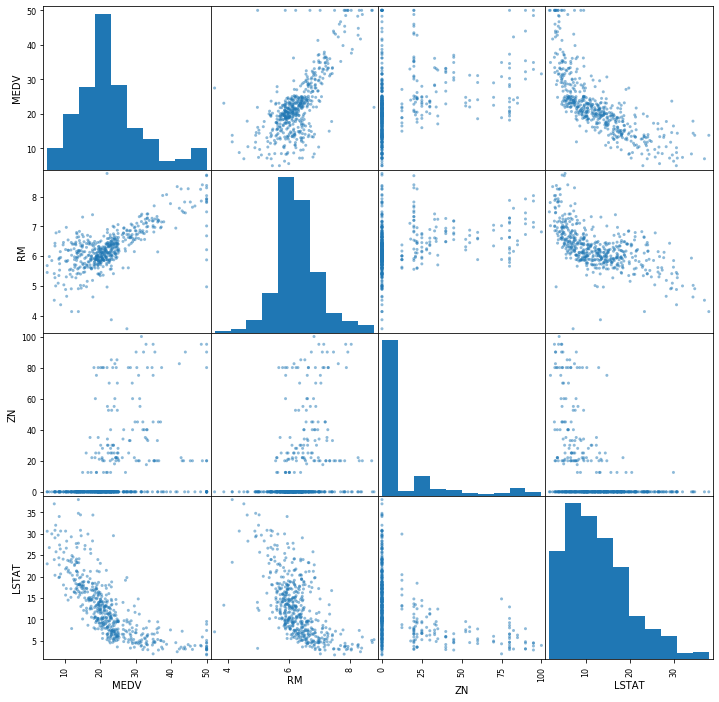

In [39]:
from pandas.plotting import scatter_matrix
attr=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attr],figsize=(12,12))

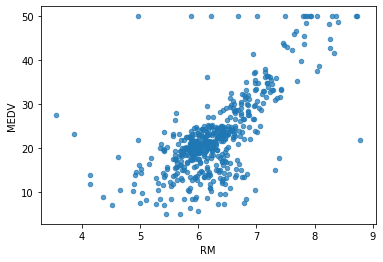

In [40]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.72)

# attribute combination

In [41]:
housing['TPM']=housing['TAX']/housing['RM']

In [42]:
housing['TPM'].head()

0    45.019011
1    37.688834
2    33.681280
3    31.723350
4    31.061984
Name: TPM, dtype: float64

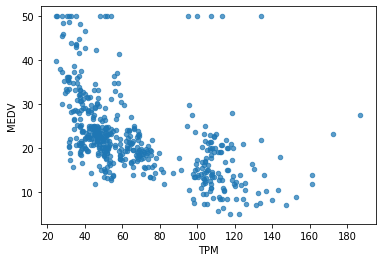

In [43]:
housing.plot(kind="scatter",x="TPM",y="MEDV",alpha=0.72)

# missing attribute

# Imputer function it likes above missing attribute function(fillna()) to fill the missing place by median of perticular column

In [1]:
from sklearn.impute import SimpleImputer
imput=SimpleImputer(strategy='median')

In [46]:
imput.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [50]:
x=imput.transform(housing)

In [51]:
h_tr=pd.DataFrame(x,columns=housing.columns)

In [49]:
h_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.742592
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.352087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.569765
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.591417
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


# scikit-learn 1.estimators 2. transform 3. prediction

# Creating a pipeline